In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
generated_df = pd.read_csv("data/mdm2p53_gen10k_desc.csv")
active_df = pd.read_csv("data/mdm2_active_desc.csv")

In [3]:
generated_qed = generated_df['QED']
active_qed = active_df['QED']

generated_qeppi = generated_df['QEPPI']
active_qeppi = active_df['QEPPI']

generated_fsp3 = generated_df['Fsp3']
active_fsp3 = active_df['Fsp3']

In [4]:
# 进行t检验：QED、QEPPI、Fsp3
t_stat_qed, p_value_qed = stats.ttest_ind(generated_qed, active_qed)
t_stat_qeppi, p_value_qeppi = stats.ttest_ind(generated_qeppi, active_qeppi)
t_stat_fsp3, p_value_fsp3 = stats.ttest_ind(generated_fsp3, active_fsp3)

In [5]:
# 输出t统计量和p值
print(f"QED t统计量: {t_stat_qed}, p值: {p_value_qed}")
print(f"QEPPI t统计量: {t_stat_qeppi}, p值: {p_value_qeppi}")
print(f"Fsp3 t统计量: {t_stat_fsp3}, p值: {p_value_fsp3}")

QED t统计量: 12.246666537914146, p值: 2.7621359427212127e-34
QEPPI t统计量: -4.77086546424145, p值: 1.8552816875506006e-06
Fsp3 t统计量: -14.720112461206332, p值: 1.2318740763413005e-48


In [6]:
# 判断显著性并打印结果
def check_significance(p_value, threshold=0.05):
    return "显著差异" if p_value < threshold else "无显著差异"

print(f"QED {check_significance(p_value_qed)}")
print(f"QEPPI {check_significance(p_value_qeppi)}")
print(f"Fsp3 {check_significance(p_value_fsp3)}")

QED 显著差异
QEPPI 显著差异
Fsp3 显著差异


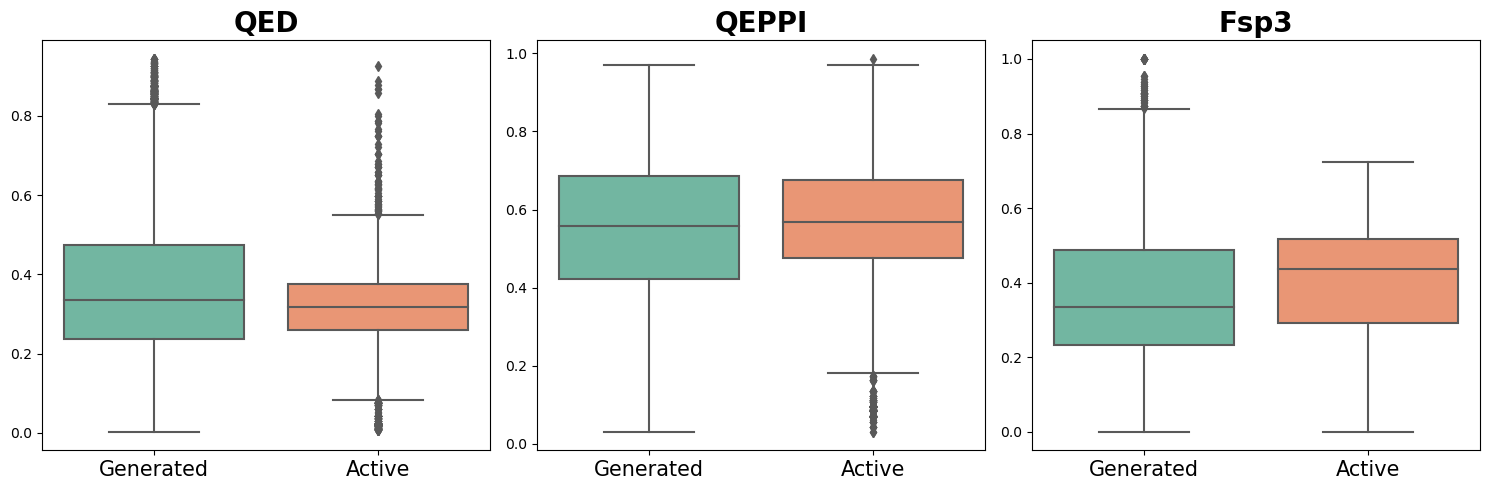

In [7]:
# 绘制箱线图比较生成分子与活性分子
plt.figure(figsize=(15, 5))

# QED对比
plt.subplot(1, 3, 1)
sns.boxplot(data=[generated_qed, active_qed], palette="Set2")
plt.xticks([0, 1], ['Generated', 'Active'], fontsize=15)
plt.title('QED', fontsize=20, fontweight='bold')

# QEPPI对比
plt.subplot(1, 3, 2)
sns.boxplot(data=[generated_qeppi, active_qeppi], palette="Set2")
plt.xticks([0, 1], ['Generated', 'Active'], fontsize=15)
plt.title('QEPPI', fontsize=20, fontweight='bold')

# Fsp3对比
plt.subplot(1, 3, 3)
sns.boxplot(data=[generated_fsp3, active_fsp3], palette="Set2")
plt.xticks([0, 1], ['Generated', 'Active'], fontsize=15)
plt.title('Fsp3', fontsize=20, fontweight='bold')

# 显示图像
plt.tight_layout()
plt.savefig("mdm2p53_t_stat.png", dpi=300)

plt.show()